# Classical models on autocorrelation features
This is an attempt to find a good model by using as features the correlation between ROIs.
First, our data:

In [66]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from util import to_corr_matrix

df = pd.read_csv("data/train_hw03.csv")
df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,id,age,sex,y,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,18.4148,male,autism,-0.458933,-0.471744,-0.461779,-0.305860,0.047765,0.356486,...,-1.996018,-1.275805,-0.371995,-0.863312,-2.453302,-2.897479,-0.681213,2.771550,4.376339,2.915170
1,7,13.5800,male,autism,-44.830406,431.883087,898.798157,926.675476,467.511444,-105.597237,...,858.979919,3550.427979,7169.964844,9281.972656,8176.752930,4087.208008,-844.500122,-4014.025635,-4296.233887,-2987.512695
2,10,18.4175,male,autism,-0.536675,-0.692978,-0.494424,0.052672,0.580352,0.634929,...,-2.918994,-0.305058,0.293893,-1.441216,-2.808750,-1.520393,1.636729,4.163283,5.010502,5.159610
3,12,17.1000,male,control,-0.356160,-0.612644,-0.175026,0.923642,2.219596,3.136657,...,-3.818442,6.657434,13.913865,11.425905,2.044530,-5.044302,-4.298348,1.248278,5.167187,5.212446
4,13,17.7800,male,control,0.532626,0.372084,0.096217,-0.236015,-0.548263,-0.364282,...,-2.548552,-2.195497,0.857750,1.657618,0.908618,1.275948,1.349784,-0.099559,-1.511268,-1.784074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,794,11.0800,male,autism,1.605719,2.087463,1.628545,0.725985,0.269245,0.587729,...,-0.119474,1.007243,1.920006,1.698236,0.360375,-1.024146,-1.301874,-0.337484,0.892852,1.302862
596,795,30.0000,male,control,0.087450,1.267322,0.487800,-0.937467,-0.388316,0.680387,...,-0.060937,-2.922512,-2.003564,3.152400,4.499738,-1.591714,-6.111772,-1.400208,6.071485,6.663968
597,796,11.2000,male,control,0.004827,-0.561140,-1.022752,-1.409737,-1.673823,-1.672471,...,-5.140858,-3.528592,-3.022926,-2.655292,-0.777803,2.447924,4.820030,4.295342,1.235895,-1.585241
598,798,27.7600,female,control,0.009636,-0.009336,-0.029836,-0.029555,-0.007096,0.015947,...,-0.442446,-0.231439,0.080499,0.279456,0.257785,0.105656,-0.012517,-0.038396,-0.040254,-0.075864


In [67]:
X = df.iloc[:, 4:].apply(to_corr_matrix, axis=1).tolist()
X[0] # each df row will be transformed into a correlation matrix

array([[ 1.        ,  0.59852271,  0.01596276, ..., -0.29558198,
         0.10804935, -0.0702961 ],
       [ 0.59852271,  1.        , -0.24094922, ..., -0.09276029,
        -0.11123823, -0.22337476],
       [ 0.01596276, -0.24094922,  1.        , ...,  0.06447252,
        -0.08096899,  0.22820237],
       ...,
       [-0.29558198, -0.09276029,  0.06447252, ...,  1.        ,
         0.24128592,  0.39596832],
       [ 0.10804935, -0.11123823, -0.08096899, ...,  0.24128592,
         1.        ,  0.48430787],
       [-0.0702961 , -0.22337476,  0.22820237, ...,  0.39596832,
         0.48430787,  1.        ]])

Naively we would have 116x116 features, but we can reduce them to half by considering that a corr matrix is simmetric and that all the values on the diagonal are 1; so we can discard more than half of the features.

In [68]:
# take only the upper triangular (all the rest of values are the same or 1)
upper_triangular_idx = np.triu_indices(116, k=1)
X = [x[upper_triangular_idx] for x in X]

In [69]:
ROIs = df.columns.str.extract(r't\d+_(\d+)')[0].unique()[1:]
ROIs_cross = [ROIs[i]+'x'+ROIs[j] for i in range(116) for j in range(i+1,116)]

# create new df from extracted features
train_data = df.iloc[:,:4].copy()
cor_df = pd.DataFrame(np.vstack(X), columns = ROIs_cross)

train_data = pd.concat([train_data, cor_df], axis=1)
train_data = train_data.set_index('id')
train_data

,age,sex,y,2001x2002,2001x2101,2001x2102,2001x2111,2001x2112,2001x2201,2001x2202,...,9130x9140,9130x9150,9130x9160,9130x9170,9140x9150,9140x9160,9140x9170,9150x9160,9150x9170,9160x9170
id,,,,,,,,,,,,,,,,,,,,,
1,18.4148,male,autism,0.598523,0.015963,-0.401368,-0.060398,-0.088864,-0.125210,-0.195189,...,0.273323,0.264100,0.424808,0.420131,0.382996,0.207414,0.077920,0.241286,0.395968,0.484308
7,13.5800,male,autism,0.118297,0.005151,0.102539,-0.180245,-0.127210,0.018084,-0.004339,...,0.888996,0.137735,-0.508790,-0.679644,0.410223,-0.227966,-0.452212,0.586639,0.394228,0.919312
10,18.4175,male,autism,0.569176,0.411863,-0.063449,0.144125,-0.059064,0.160399,0.025133,...,0.504460,0.194350,0.525071,0.513382,0.493730,0.355361,0.391225,0.479056,0.346927,0.688313
12,17.1000,male,control,0.640348,-0.221460,-0.188593,-0.287224,-0.208609,-0.072819,0.128095,...,0.429451,0.318852,-0.115061,-0.049994,0.381939,0.090490,0.082956,0.396449,-0.001523,0.213470
13,17.7800,male,control,0.290582,-0.112390,-0.113786,-0.126013,-0.072083,-0.028029,-0.236445,...,0.601165,0.455271,0.310264,-0.033721,0.374615,0.240237,0.053896,0.756615,0.379470,0.327635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,11.0800,male,autism,0.306915,0.181358,-0.607665,0.064164,0.426378,0.411998,-0.200528,...,0.691790,0.404769,0.349493,0.314743,0.550258,0.389888,0.343335,0.686072,0.515995,0.621507
795,30.0000,male,control,0.723682,-0.026289,-0.488542,-0.006708,-0.236119,-0.500962,-0.509984,...,0.300936,0.004818,0.109356,0.020918,-0.165635,-0.012364,0.255707,0.537208,0.234801,0.039268
796,11.2000,male,control,0.538899,0.454368,-0.162851,-0.215812,-0.112210,0.256790,0.179207,...,0.346542,-0.181252,0.268167,0.091870,0.076441,0.335464,0.169772,0.073574,0.433119,0.421155


### Data Transformer pipeline
Now we put the process above in a single pipeline, in such a way to make it easily reproducible

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer as mk_transformer, make_column_selector as select
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


def to_corr_features(features):
    '''transforms a df row into a df row of correlations'''
    upper_triangular_idx = np.triu_indices(116, k=1)
    
    cor_mat = features\
                .apply(to_corr_matrix, axis=1)\
                .apply(lambda x: x[upper_triangular_idx])\
                .values
    
    return pd.DataFrame(np.vstack(cor_mat), columns = ROIs_cross)
   
correlation_transformer = mk_transformer(
    (FunctionTransformer(func=to_corr_features), select(r't\d+_\d+')),
    (OneHotEncoder(drop='if_binary'), ['sex']),
    remainder='passthrough'
)

correlation_transformer.fit_transform(df)

array([[0.5985227114631797, 0.015962763780229653, -0.40136757512637655,
        ..., 1, 18.4148, 'autism'],
       [0.11829666496953581, 0.005150717868535977, 0.1025392922353061,
        ..., 7, 13.58, 'autism'],
       [0.5691762086393266, 0.41186344950053266, -0.06344889429236682,
        ..., 10, 18.4175, 'autism'],
       ...,
       [0.5388988333385168, 0.4543684239417609, -0.16285110793280377,
        ..., 796, 11.2, 'control'],
       [0.4789507808612538, -0.18559863223378573, -0.4550905584825864,
        ..., 798, 27.76, 'control'],
       [0.5483511340347516, 0.09435035268812417, -0.12314326690392169,
        ..., 799, 22.0, 'autism']], dtype=object)

### Data split
This data split won't be used very much later because we prefer doing cross validation.

In [71]:
from sklearn.model_selection import train_test_split
df = df.set_index('id') if df.index.name != 'id' else df
X = df.loc[:, df.columns!='y']
y = (df.y == 'autism').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

# Train
I started thinking of using a Random Forest, but that proved to be less performant and slower to train, SVMs instead proved more efficient (also less parameters to tune).

Here's below the train pipeline and a fit without parameter tuning.

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer

# pipe = make_pipeline(
#     correlation_transformer,
#     RandomForestClassifier()
# )
pipe = make_pipeline(
    correlation_transformer,
    # SimpleImputer(),
    KNNImputer(),
    SVC()
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function to_corr_features at 0x000002181241BB50>),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000218124484C0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('knnimputer', KNNImputer()), ('svc', SVC())])

('Accuracy', 0.5222222222222223)

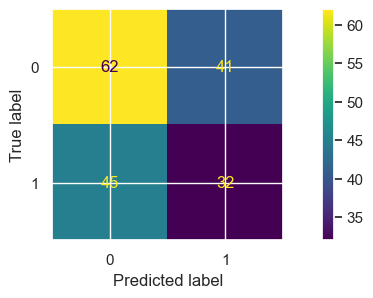

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

y_hat = pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
'Accuracy', sum(y_hat == y_test) / len(y_hat)

## GridSearch
The number of parameters for the SVC is rather small, and by looking at the results it also appears that the `class_weight` isn't that effective at all, mainly we need to tune the `C` parameter, which is the regularization term.

Best Params I obtained: `{'svc__C': 2.5, 'svc__class_weight': None}`

In [76]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'randomforestclassifier__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
#     'randomforestclassifier__max_features' : ['log2', 'sqrt', 50],
#     'randomforestclassifier__oob_score'    : [True, False],
#     'randomforestclassifier__criterion'    : ['gini', 'log_loss', 'entropy'],
#     'randomforestclassifier__class_weight' : ['balanced', 'balanced_subsample', None],
#     'randomforestclassifier__min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
# }

param_grid = {
   'svc__C' : np.arange(2, 3, 0.02), # np.arange(0.1, 10, 0.1),
#    'svc__class_weight' : ['balanced', None],
    # 'simpleimputer__strategy': ['mean', 'median'],
    'knnimputer__n_neighbors' : [4, 5, 6, 7, 10]
}
model = GridSearchCV(
    pipe, 
    param_grid, 
    scoring = 'accuracy', 
    n_jobs=-1, verbose = 10)
model.fit(X, y)
model.best_params_, model.best_score_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


<AxesSubplot: xlabel='param_svc__C', ylabel='value'>

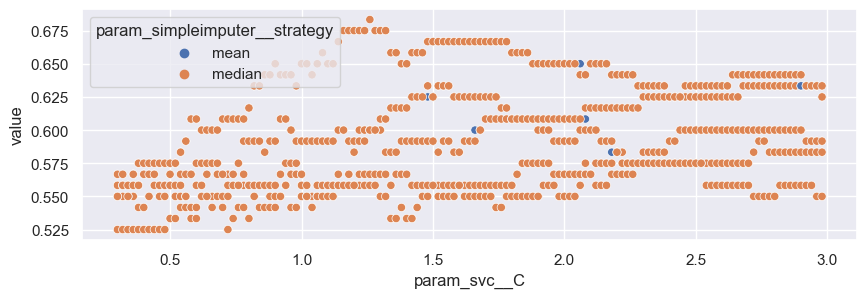

In [63]:
res = pd.DataFrame(model.cv_results_)
res = res.fillna('unadjusted')
cols = lambda rex: res.columns.to_series().filter(regex=rex).tolist()
res = res.melt(id_vars=cols(r'param_.*'), value_vars=cols(r'split\d+_.*'))


sns.set(rc={'figure.figsize':(10,3)})

# if you have more than 2 hyperparams:
# for param in param_grid.keys():
#     sns.boxplot(res, x = 'value', y = 'param_' + param, orient='h')
#     plt.show()
sns.scatterplot(res, x='param_svc__C', y = 'value', hue = 'param_simpleimputer__strategy')

Comment: 
- it appears that the class_weight doesn't make that much of a difference.
- also it looks like that over some value of `C` (like 3) the performance is always the same and it's not worth exploring


![gridsearch 1](output/SVC_gridsearch_C[0,10].png "Gridsearch for C $\in$ [0,10]")



# Submission
Code for submitting to the competition, just run this cell and upload the results.

In [64]:
from sklearn.base import clone

final = clone(pipe)
BEST_PARAMS = {'svc__C': 2.5, 'svc__class_weight': None} # model.best_params_
final.set_params(**BEST_PARAMS)
final.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function to_corr_features at 0x00000218072C2A70>),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021812434820>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('simpleimputer', SimpleImputer()), ('svc', SVC(C=2.5))])

In [65]:
competition = pd.read_csv("data/test_hw03.csv")
competition = competition.set_index('id') if competition.index.name != 'id' else competition
X_compete = competition.loc[:, competition.columns!='y']


competition['target'] = np.where(final.predict(X_compete), 'autism', 'control')
competition['target'].to_csv('data/submission.csv')

# Variable Importance
We first have to assess variable importance in our model. Note that in this section we'll use the data already transformed, and we'll just use the last step of the pipe.

In [11]:
correlation_transformer.set_output(transform='pandas')
correlation_transformer.set_params(onehotencoder__sparse_output=False)
correlation_transformer.set_params(sparse_threshold=0)
# old feature matrix but with engineered features explicit
X = correlation_transformer.fit_transform(df.reset_index(drop=True).drop(columns=['y']))
X.columns = X.columns.str.extract(r'.*__(.*)')[0]
# old model (already trained) but ready to accept explicit features
model = clone(final.steps[1][1])
y = (df.y == 'autism').astype(int)
X

C:\Users\Archimede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


,2001x2002,2001x2101,2001x2102,2001x2111,2001x2112,2001x2201,2001x2202,2001x2211,2001x2212,2001x2301,...,9130x9160,9130x9170,9140x9150,9140x9160,9140x9170,9150x9160,9150x9170,9160x9170,sex_male,age
0,0.598523,0.015963,-0.401368,-0.060398,-0.088864,-0.125210,-0.195189,-0.221822,-0.371578,0.148315,...,0.424808,0.420131,0.382996,0.207414,0.077920,0.241286,0.395968,0.484308,1.0,18.4148
1,0.118297,0.005151,0.102539,-0.180245,-0.127210,0.018084,-0.004339,-0.183935,-0.137153,0.341141,...,-0.508790,-0.679644,0.410223,-0.227966,-0.452212,0.586639,0.394228,0.919312,1.0,13.5800
2,0.569176,0.411863,-0.063449,0.144125,-0.059064,0.160399,0.025133,-0.132366,-0.137658,0.273938,...,0.525071,0.513382,0.493730,0.355361,0.391225,0.479056,0.346927,0.688313,1.0,18.4175
3,0.640348,-0.221460,-0.188593,-0.287224,-0.208609,-0.072819,0.128095,-0.002412,0.399582,0.062295,...,-0.115061,-0.049994,0.381939,0.090490,0.082956,0.396449,-0.001523,0.213470,1.0,17.1000
4,0.290582,-0.112390,-0.113786,-0.126013,-0.072083,-0.028029,-0.236445,0.292202,0.005269,0.360694,...,0.310264,-0.033721,0.374615,0.240237,0.053896,0.756615,0.379470,0.327635,1.0,17.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.306915,0.181358,-0.607665,0.064164,0.426378,0.411998,-0.200528,-0.437315,-0.487579,0.564615,...,0.349493,0.314743,0.550258,0.389888,0.343335,0.686072,0.515995,0.621507,1.0,11.0800
596,0.723682,-0.026289,-0.488542,-0.006708,-0.236119,-0.500962,-0.509984,-0.043423,-0.384265,0.555931,...,0.109356,0.020918,-0.165635,-0.012364,0.255707,0.537208,0.234801,0.039268,1.0,30.0000
597,0.538899,0.454368,-0.162851,-0.215812,-0.112210,0.256790,0.179207,-0.173554,-0.243653,0.323454,...,0.268167,0.091870,0.076441,0.335464,0.169772,0.073574,0.433119,0.421155,1.0,11.2000
598,0.478951,-0.185599,-0.455091,-0.405199,-0.140636,-0.124498,-0.311005,-0.086814,0.014383,0.271426,...,0.243515,0.098323,0.227063,-0.085933,-0.162182,0.362676,0.035261,0.070575,0.0,27.7600


## Linear Importance
Fit a linear SVM and find the most important features by coefficient's magnitude. I don't know how much this method is legit, this is just an approximation (?)

Plus note: they change evrytime you rerun the algorithm.

In [20]:
from sklearn.svm import LinearSVC
from tqdm import tqdm

linear = LinearSVC(C = 2.5)

# recompute the coefs 50 times to get an average
linear_coefs = [linear.fit(X, y).coef_ for _ in tqdm(range(50))]
linear_coefs = np.median(linear_coefs, axis=0).flatten()

100%|██████████| 50/50 [02:35<00:00,  3.12s/it]


[Text(0.5, 1.0, 'Importance based on linear SVM')]

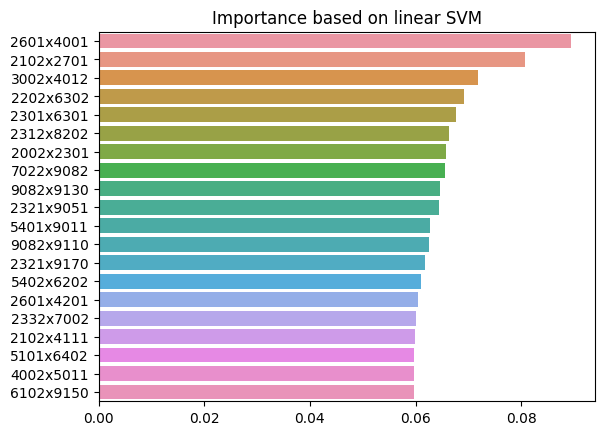

In [25]:
linear_imp_index  = linear_coefs.argsort()[::-1]
linear_imp_values = linear_coefs[linear_imp_index]
linear_imp_cols =  X.columns[linear_imp_index].values

linear_imp_cols_100 = linear_imp_cols[:100]

sns.barplot(x = linear_imp_values[:20], y = linear_imp_cols[:20]).set(title='Importance based on linear SVM')

## Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, RepeatedKFold

kf = RepeatedKFold(n_splits = 4, n_repeats = 1)
perm_res = []

for train_idx, test_idx in tqdm(kf.split(X)):
    model.fit(X.loc[train_idx], y[train_idx])
    pr = permutation_importance(
        model, X.loc[test_idx], y[test_idx],
        scoring = 'accuracy',
        n_repeats = 1
    )
    perm_res.append(pr)

0it [00:00, ?it/s]


KeyError: '[0, 2, 3, 4, 5, 6, 9, 11, 19, 21, 22, 30, 38, 54, 55, 60, 61, 63, 67, 72, 81, 90, 95, 103, 105, 108, 109, 118, 119, 120, 124, 127, 135, 138, 141, 143, 145, 163, 171, 173, 193, 195, 199, 216, 222, 224, 227, 229, 241, 249, 255, 257, 259, 262, 265, 281, 283, 284, 288, 289, 293, 294, 302, 314, 321, 327, 338, 348, 349, 350, 354, 355, 358, 374, 385, 388, 393, 397, 409, 410, 416, 417, 419, 424, 429, 435, 442, 447, 448, 449, 452, 457, 458, 469, 474, 482, 483, 485, 490, 491, 506, 508, 509, 519, 523, 526, 529, 536, 537, 543, 555, 562, 563, 564, 570, 572, 578, 580, 587, 590, 592, 594, 596] not in index'

[Text(0.5, 1.0, 'Importance based on linear SVM')]

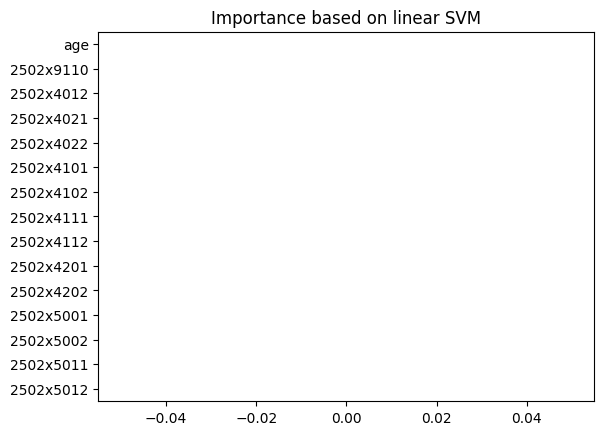

In [ ]:


imp_index = perm_res[0]['importances_mean'].argsort()[::-1]
imp_values = perm_res[0]['importances_mean'][imp_index]
imp_cols =  X.columns[imp_index].values

sns.barplot(x = imp_values[:15], y = imp_cols[:15]).set(title='Importance based on permutation test')

In [51]:
X[np.any(X.drop(columns='sex_male') == 0, axis = 1)]

,2001x2002,2001x2101,2001x2102,2001x2111,2001x2112,2001x2201,2001x2202,2001x2211,2001x2212,2001x2301,...,9130x9160,9130x9170,9140x9150,9140x9160,9140x9170,9150x9160,9150x9170,9160x9170,sex_male,age
23,0.189980,-0.053850,-0.435133,-0.186386,-0.057574,-0.116528,-0.315838,-0.030084,-0.162660,0.498764,...,0.085348,0.366916,0.462397,0.178391,0.384343,0.211469,0.335488,0.372305,1.0,14.37
29,0.777108,-0.230028,0.030846,-0.266246,-0.272964,-0.517037,-0.106182,-0.138180,-0.126191,0.409143,...,0.430120,0.085475,0.305890,0.420864,0.159753,0.336298,0.134382,0.469917,1.0,27.92
48,0.497040,-0.243180,-0.431038,-0.431380,-0.236180,0.059551,-0.340466,-0.107933,-0.423337,0.660011,...,0.119708,-0.129585,0.230270,0.106166,-0.136345,0.682409,0.461721,0.492590,1.0,21.00
62,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,0.204085,0.027663,0.721721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,15.70
73,0.449079,0.201309,0.269047,-0.086414,0.102385,0.280620,0.283778,0.129111,-0.092988,0.422612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,39.00
129,-0.056386,-0.191739,-0.042860,-0.244697,-0.171745,-0.034421,-0.341295,-0.042002,-0.104962,-0.040984,...,0.058437,0.275603,0.482365,0.001014,-0.067925,0.421982,0.123297,0.633937,0.0,30.00
137,0.371073,0.340416,0.165785,0.319523,0.071653,-0.006067,0.102873,0.247239,0.153692,0.145438,...,-0.101063,0.494471,0.630120,0.089310,0.583527,0.391849,0.529610,0.202928,1.0,17.78
357,0.320408,-0.156421,-0.115766,-0.306091,0.034975,-0.147885,-0.228411,-0.237148,0.020136,0.445899,...,-0.072048,0.411215,0.322524,0.208173,-0.071341,0.282784,-0.055727,0.144371,1.0,19.09
385,0.536694,0.369469,0.458037,0.171552,0.195253,0.313508,0.055014,-0.248116,-0.039547,0.259950,...,-0.054765,-0.154524,0.160065,0.071041,0.099065,0.179972,0.162212,0.224677,1.0,26.00
390,0.239704,0.334075,-0.133219,0.396904,0.218766,0.401353,-0.211222,0.330301,0.118898,0.499315,...,0.411275,0.662582,0.576929,0.390116,0.636213,0.414633,0.584703,0.823124,1.0,41.00


## Loco

In [40]:
from util import loco_importance, log_loss

model.set_params(probability = True)
loco_importance(model, X, y, linear_imp_cols_100[:10])

,variable,loss
5,2312x8202,0.007674
6,2002x2301,0.006377
1,2102x2701,-0.000129
8,9082x9130,-0.000194
2,3002x4012,-0.002085
7,7022x9082,-0.002860
4,2301x6301,-0.008253
0,2601x4001,-0.010197
3,2202x6302,-0.013157
9,2321x9051,-0.017748
